### Họ và tên: Trần Phú Thọ
### MSSV: 22653431

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# 3.1 Image thresholding

## 3.1.1 Adaptive thresholding

### Ex 3.1

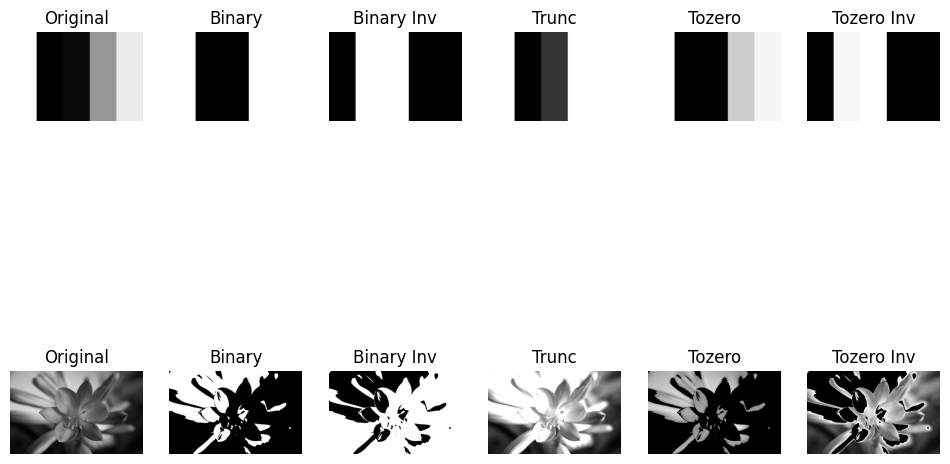

In [2]:
gray_shades = cv2.imread('grayShades.jpg', cv2.IMREAD_GRAYSCALE)
gray_flowers = cv2.imread('grayFlowers.jpg', cv2.IMREAD_GRAYSCALE)

# Đặt ngưỡng
thresh_value = 127
max_value = 255

_, thresh_binary_shades = cv2.threshold(gray_shades, thresh_value, max_value, cv2.THRESH_BINARY)
_, thresh_binary_inv_shades = cv2.threshold(gray_shades, thresh_value, max_value, cv2.THRESH_BINARY_INV)
_, thresh_trunc_shades = cv2.threshold(gray_shades, thresh_value, max_value, cv2.THRESH_TRUNC)
_, thresh_tozero_shades = cv2.threshold(gray_shades, thresh_value, max_value, cv2.THRESH_TOZERO)
_, thresh_tozero_inv_shades = cv2.threshold(gray_shades, thresh_value, max_value, cv2.THRESH_TOZERO_INV)

_, thresh_binary_flowers = cv2.threshold(gray_flowers, thresh_value, max_value, cv2.THRESH_BINARY)
_, thresh_binary_inv_flowers = cv2.threshold(gray_flowers, thresh_value, max_value, cv2.THRESH_BINARY_INV)
_, thresh_trunc_flowers = cv2.threshold(gray_flowers, thresh_value, max_value, cv2.THRESH_TRUNC)
_, thresh_tozero_flowers = cv2.threshold(gray_flowers, thresh_value, max_value, cv2.THRESH_TOZERO)
_, thresh_tozero_inv_flowers = cv2.threshold(gray_flowers, thresh_value, max_value, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary Inv', 'Trunc', 'Tozero', 'Tozero Inv']
images_shades = [gray_shades, thresh_binary_shades, thresh_binary_inv_shades, thresh_trunc_shades, thresh_tozero_shades, thresh_tozero_inv_shades]
images_flowers = [gray_flowers, thresh_binary_flowers, thresh_binary_inv_flowers, thresh_trunc_flowers, thresh_tozero_flowers, thresh_tozero_inv_flowers]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 6, i + 1)
    plt.imshow(images_shades[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

for i in range(6):
    plt.subplot(2, 6, i + 7)
    plt.imshow(images_flowers[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


### Ex 3.2


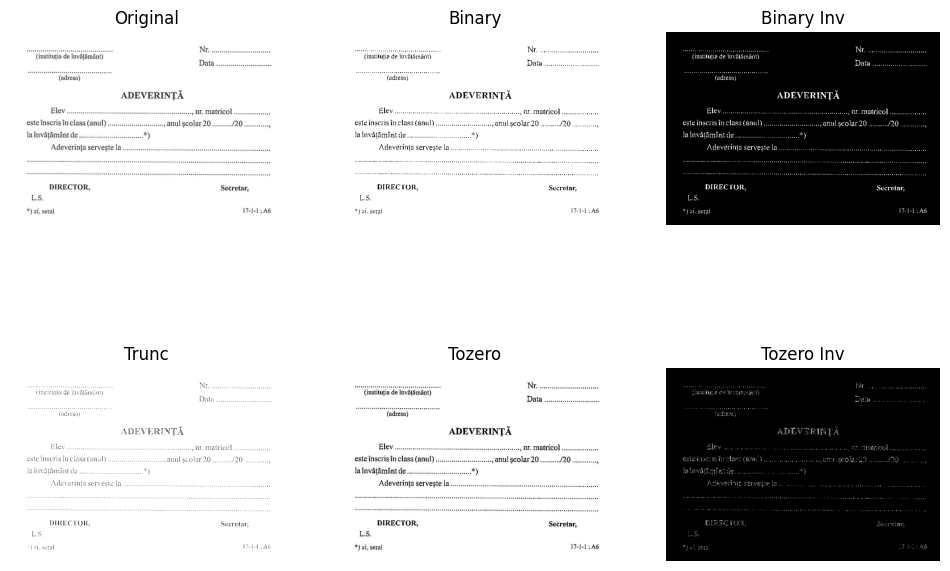

In [3]:
adeverinta_image = cv2.imread('adeverinta.jpg', cv2.IMREAD_GRAYSCALE)
thresh_value = 127
max_value = 255

_, thresh_binary = cv2.threshold(adeverinta_image, thresh_value, max_value, cv2.THRESH_BINARY)
_, thresh_binary_inv = cv2.threshold(adeverinta_image, thresh_value, max_value, cv2.THRESH_BINARY_INV)
_, thresh_trunc = cv2.threshold(adeverinta_image, thresh_value, max_value, cv2.THRESH_TRUNC)
_, thresh_tozero = cv2.threshold(adeverinta_image, thresh_value, max_value, cv2.THRESH_TOZERO)
_, thresh_tozero_inv = cv2.threshold(adeverinta_image, thresh_value, max_value, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary Inv', 'Trunc', 'Tozero', 'Tozero Inv']
images = [adeverinta_image, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


### Ex 3.3

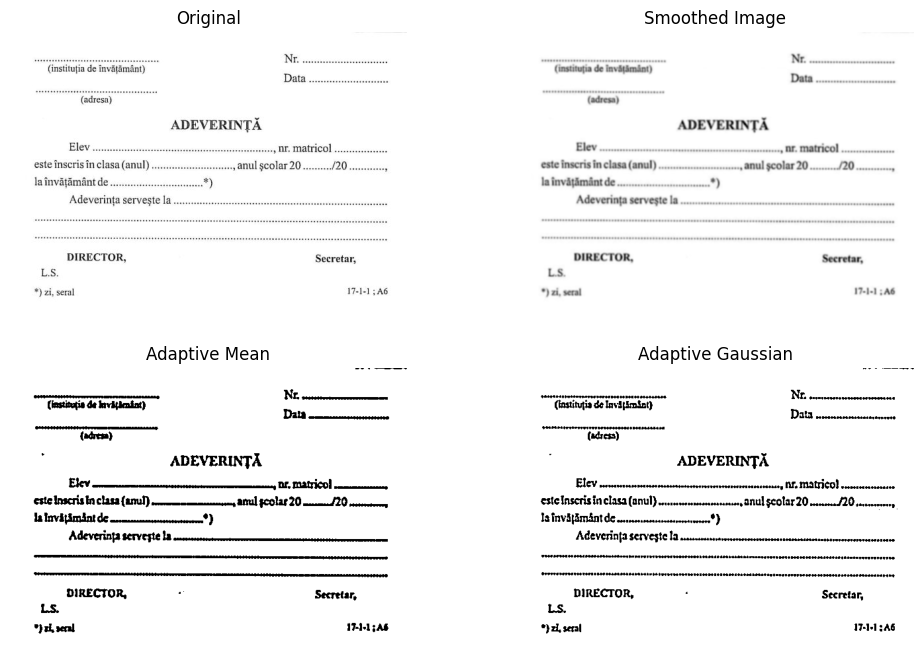

In [4]:
adeverinta_image = cv2.imread('adeverinta.jpg', cv2.IMREAD_GRAYSCALE)
smoothed_image = cv2.GaussianBlur(adeverinta_image, (5, 5), 0)

adaptive_thresh_mean = cv2.adaptiveThreshold(smoothed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(smoothed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original', 'Smoothed Image', 'Adaptive Mean', 'Adaptive Gaussian']
images = [adeverinta_image, smoothed_image, adaptive_thresh_mean, adaptive_thresh_gaussian]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

## 3.1.2 Otsu’s thresholding


### Ex 3.4

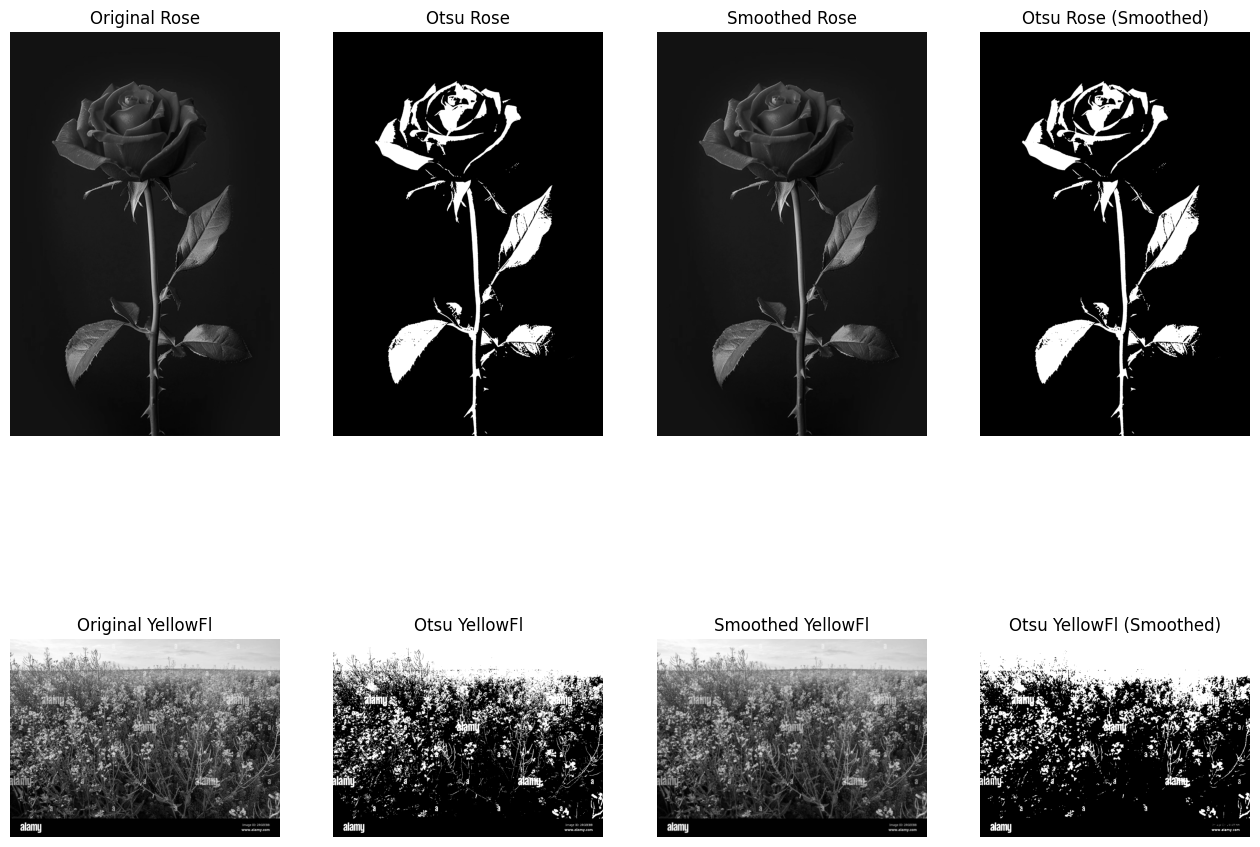

In [5]:
rose_image = cv2.imread('rose.jpg', cv2.IMREAD_GRAYSCALE)
yellow_fl_image = cv2.imread('yellowFl.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng Otsu Thresholding mà không làm mịn
_, otsu_rose = cv2.threshold(rose_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu_yellow_fl = cv2.threshold(yellow_fl_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Áp dụng Gaussian smoothing trước khi Otsu Thresholding
smoothed_rose = cv2.GaussianBlur(rose_image, (5, 5), 0)
smoothed_yellow_fl = cv2.GaussianBlur(yellow_fl_image, (5, 5), 0)

# Áp dụng Otsu Thresholding sau khi làm mịn
_, otsu_rose_smoothed = cv2.threshold(smoothed_rose, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu_yellow_fl_smoothed = cv2.threshold(smoothed_yellow_fl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original Rose', 'Otsu Rose', 'Smoothed Rose', 'Otsu Rose (Smoothed)',
          'Original YellowFl', 'Otsu YellowFl', 'Smoothed YellowFl', 'Otsu YellowFl (Smoothed)']
images = [rose_image, otsu_rose, smoothed_rose, otsu_rose_smoothed,
          yellow_fl_image, otsu_yellow_fl, smoothed_yellow_fl, otsu_yellow_fl_smoothed]

plt.figure(figsize=(16, 12))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


# 3.2 Morphological Operations


## 3.2.1 Dilation


### Ex 3.5

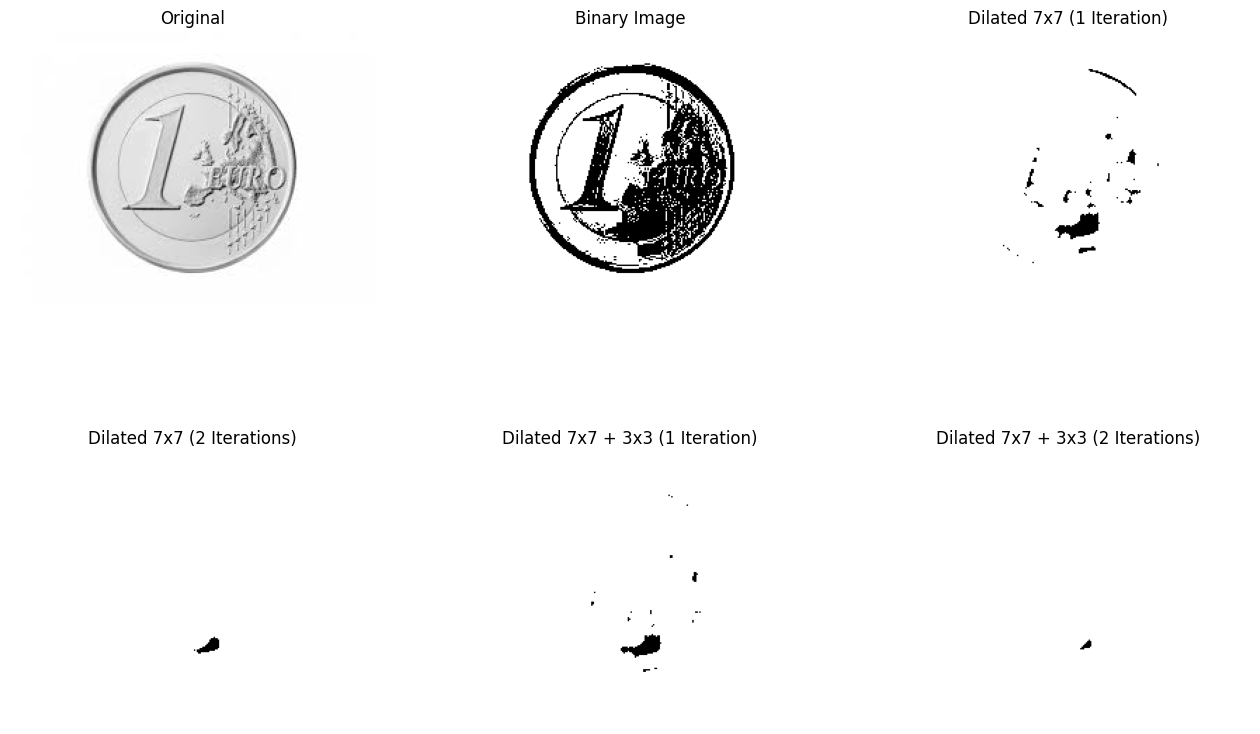

In [6]:
euro_image = cv2.imread('euro.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(euro_image, 212, 255, cv2.THRESH_BINARY)

kernel_ellipse_7x7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
kernel_ellipse_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Áp dụng phép giãn (Dilation) với kernel 7x7 (1 và 2 lần lặp)
dilated_7x7_iter1 = cv2.dilate(binary_image, kernel_ellipse_7x7, iterations=1)
dilated_7x7_iter2 = cv2.dilate(binary_image, kernel_ellipse_7x7, iterations=2)

# Áp dụng phép giãn tiếp tục với kernel 3x3 (1 và 2 lần lặp) lên kết quả từ 7x7 dilation
dilated_7x7_3x3_iter1 = cv2.dilate(dilated_7x7_iter1, kernel_ellipse_3x3, iterations=1)
dilated_7x7_3x3_iter2 = cv2.dilate(dilated_7x7_iter2, kernel_ellipse_3x3, iterations=2)

titles = [
    'Original', 'Binary Image', 
    'Dilated 7x7 (1 Iteration)', 'Dilated 7x7 (2 Iterations)',
    'Dilated 7x7 + 3x3 (1 Iteration)', 'Dilated 7x7 + 3x3 (2 Iterations)'
]
images = [
    euro_image, binary_image, 
    dilated_7x7_iter1, dilated_7x7_iter2, 
    dilated_7x7_3x3_iter1, dilated_7x7_3x3_iter2
]

plt.figure(figsize=(16, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


## 3.2.2 Erosion


## 3.2.3 Opening and Closing


### Ex 3.6

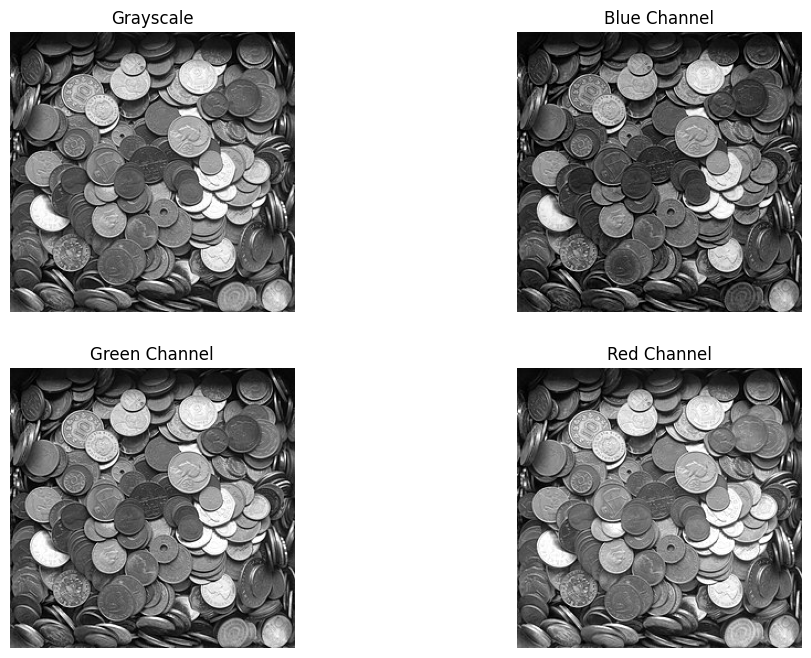

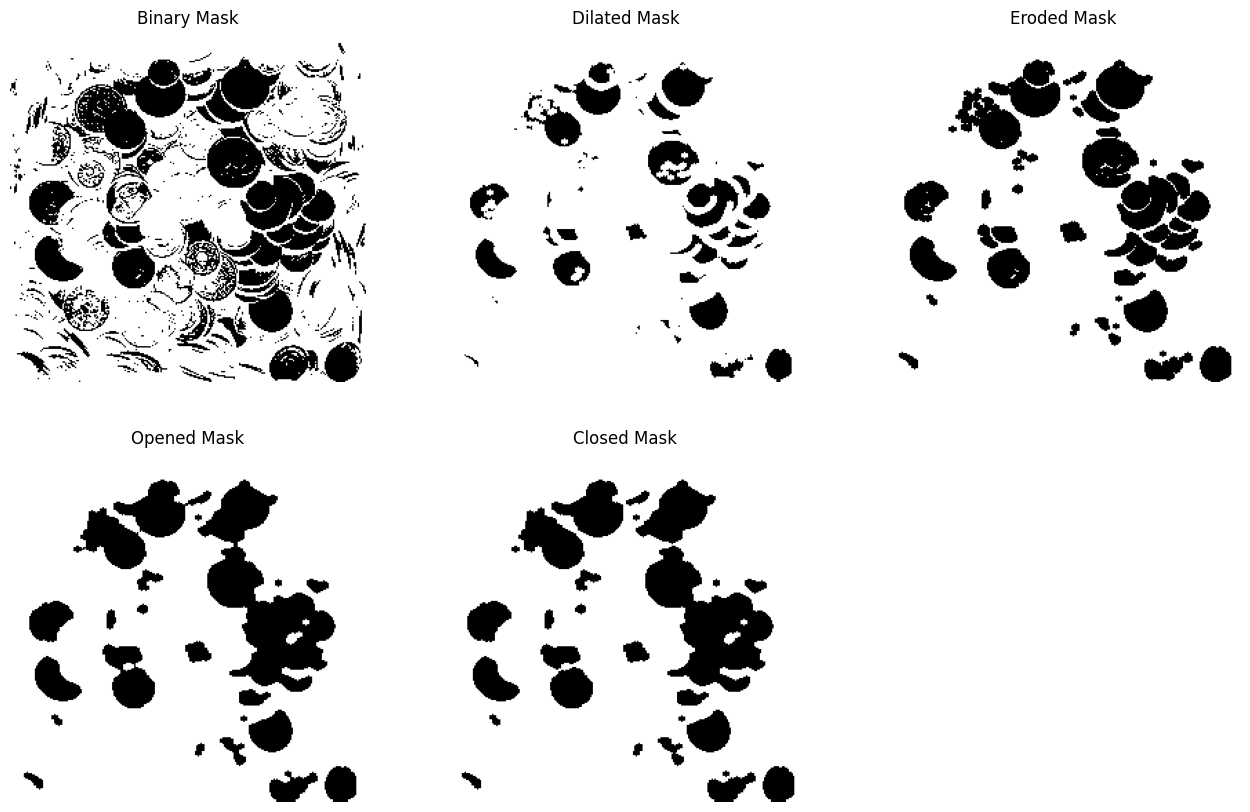

In [7]:
coins_image = cv2.imread('Coins.png')
coins_gray = cv2.cvtColor(coins_image, cv2.COLOR_BGR2GRAY)

# Tách các kênh màu: Blue, Green, Red
blue_channel, green_channel, red_channel = cv2.split(coins_image)
titles = ['Grayscale', 'Blue Channel', 'Green Channel', 'Red Channel']
images = [coins_gray, blue_channel, green_channel, red_channel]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

_, binary_mask = cv2.threshold(coins_gray, 130, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
dilated_mask = cv2.dilate(binary_mask, kernel, iterations=1)

# Erosion
eroded_mask = cv2.erode(dilated_mask, kernel, iterations=1)

# Opening
opened_mask = cv2.morphologyEx(eroded_mask, cv2.MORPH_OPEN, kernel)

# Closing
closed_mask = cv2.morphologyEx(opened_mask, cv2.MORPH_CLOSE, kernel)

titles_mask = ['Binary Mask', 'Dilated Mask', 'Eroded Mask', 'Opened Mask', 'Closed Mask']
masks = [binary_mask, dilated_mask, eroded_mask, opened_mask, closed_mask]

plt.figure(figsize=(16, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(masks[i], cmap='gray')
    plt.title(titles_mask[i])
    plt.axis('off')

plt.show()


# 3.3 Edge detection


## 3.3.1 Canny edge detector


### Ex 3.7

In [ ]:
import cv2
import numpy as np

# Hàm callback mặc định cho trackbar (không cần làm gì trong callback này)
def empty_callback(x):
    pass

# Đọc ảnh 'rose.jpg' và chuyển đổi thành ảnh xám
image = cv2.imread('rose.jpg')
if image is None:
    print("Error: Unable to read image file. Please check the path and filename.")
    exit(1)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tạo cửa sổ để chứa các trackbar và hiển thị kết quả
cv2.namedWindow('Canny Edge Detection')

# Tạo các trackbar với giá trị mặc định
cv2.createTrackbar('Min Threshold', 'Canny Edge Detection', 50, 255, empty_callback)
cv2.createTrackbar('Max Threshold', 'Canny Edge Detection', 150, 255, empty_callback)

# Vòng lặp để cập nhật giá trị và hiển thị ảnh theo thời gian thực
while True:
    # Lấy giá trị ngưỡng từ trackbar
    low_threshold = cv2.getTrackbarPos('Min Threshold', 'Canny Edge Detection')
    high_threshold = cv2.getTrackbarPos('Max Threshold', 'Canny Edge Detection')

    # Áp dụng phát hiện cạnh Canny với các ngưỡng hiện tại
    edges = cv2.Canny(image_gray, low_threshold, high_threshold)

    # Hiển thị kết quả
    cv2.imshow('Canny Edge Detection', edges)

    # Thoát chương trình khi người dùng nhấn phím 'Esc'
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Phím 'Esc'
        break

# Đóng tất cả các cửa sổ khi thoát
cv2.destroyAllWindows()
